In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline



In [5]:
df = pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

KeyError: "['customerID'] not found in axis"

In [47]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [48]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [49]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [17]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


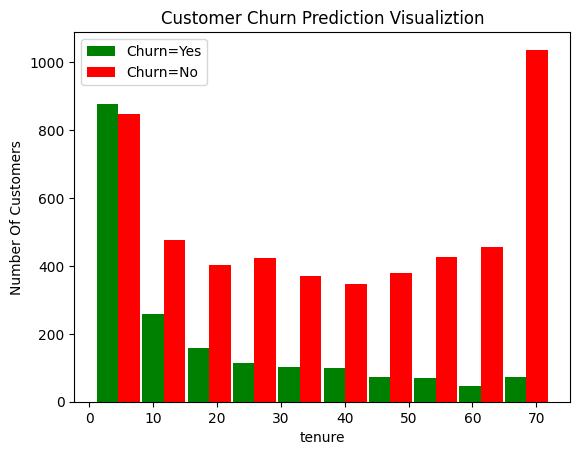

In [18]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")


plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

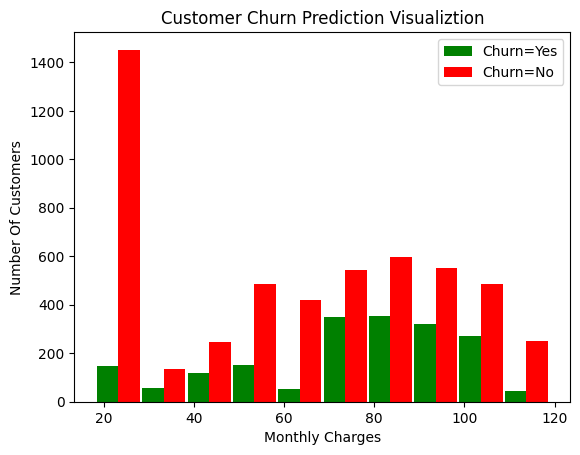

In [19]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [20]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [23]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
    df1[col].replace({'Yes':1, 'No':0 }, inplace=True )

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/1682338015.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes':1, 'No':0 }, inplace=True )
/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/1682338015.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/1621073744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1, 'Male': 0}, inplace=True)
/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/1621073744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [27]:
df1.gender.unique()

array([1, 0])

In [28]:
df2 = pd.get_dummies(data = df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [30]:
tru_fal_col = ['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month','Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']

for col in tru_fal_col:
    df2[col].replace({True:1, False:0 }, inplace=True )

/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/3519977606.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace({True:1, False:0 }, inplace=True )
/var/folders/7h/hhfb2zp15xn9_lf52_bb379h0000gn/T/ipykernel_3095/3519977606.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [31]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [33]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [34]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [35]:
X = df2.drop('Churn',axis='columns')
Y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [36]:
X_train.shape

(5625, 26)

In [37]:
y_train.shape

(5625,)

In [38]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation= 'relu'),
    keras.layers.Dense(1, activation= 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train,y_train, epochs= 100)

Epoch 1/100


/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.7047 - loss: 0.5714
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.7047 - loss: 0.5714
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8052 - loss: 0.4163
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.8052 - loss: 0.4163
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8045 - loss: 0.4092
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8045 - loss: 0.4092
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8020 - loss: 0.4143
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8020 - loss: 0.4143
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8049 - loss: 0.4134
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.8049 - loss: 0.4134
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8011 - loss: 0.4107
Epoch 7/100
176/176 ━━━━━━━━━━━━━

In [39]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7696 - loss: 0.4867
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.7696 - loss: 0.4867


[0.4982166290283203, 0.7654584050178528]

In [40]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step


array([[0.27730054],
       [0.5657751 ],
       [0.01559239],
       [0.643249  ],
       [0.22004001]], dtype=float32)

In [41]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [42]:
y_pred[:10]


[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [43]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       999
           1       0.62      0.48      0.54       408

    accuracy                           0.77      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.75      0.77      0.76      1407


Confusion Matrix:
[[880 119]
 [211 197]]


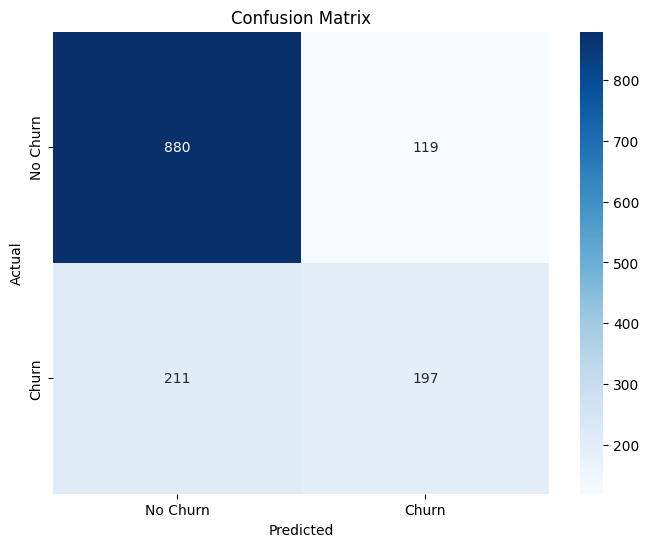

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Convert y_test to list for easier comparison
y_test_list = y_test.tolist()

print("Classification Report:")
print(classification_report(y_test_list, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_list, y_pred)
print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Model Performance Metrics:
Accuracy: 0.7655
Precision: 0.6234
Recall: 0.4828
F1-Score: 0.5442
AUC-ROC: 0.8091


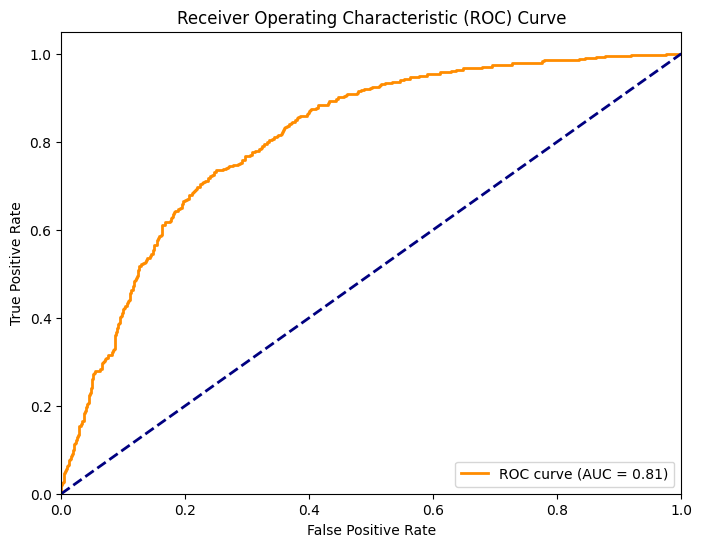

In [45]:
# Additional metrics for comprehensive evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Calculate metrics
accuracy = accuracy_score(y_test_list, y_pred)
precision = precision_score(y_test_list, y_pred)
recall = recall_score(y_test_list, y_pred)
f1 = f1_score(y_test_list, y_pred)
auc_score = roc_auc_score(y_test_list, yp)

print(f"Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {auc_score:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_list, yp)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Model Improvement Techniques

Let's try several techniques to improve model accuracy:
1. **Feature Engineering**: Add new features
2. **Model Architecture**: Try different network architectures
3. **Regularization**: Add dropout and batch normalization
4. **Hyperparameter Tuning**: Optimize learning rate, batch size, etc.
5. **Class Balancing**: Handle imbalanced dataset
6. **Cross-validation**: Better evaluation strategy

In [ ]:
# 1. Feature Engineering - Create new meaningful features
df3 = df2.copy()

# Create new features
df3['MonthlyCharges_per_tenure'] = df3['MonthlyCharges'] / (df3['tenure'] + 1)  # Avoid division by zero
df3['TotalCharges_per_tenure'] = df3['TotalCharges'] / (df3['tenure'] + 1)
df3['AvgChargesPerMonth'] = df3['TotalCharges'] / (df3['tenure'] + 1)

# Service count features
service_cols = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df3['TotalServices'] = df3[service_cols].sum(axis=1)

# Contract and payment interaction
df3['Contract_Electronic'] = df3['Contract_Month-to-month'] * df3['PaymentMethod_Electronic check']

print("New features created:")
print(f"Dataset shape: {df3.shape}")
print(f"New columns: {[col for col in df3.columns if col not in df2.columns]}")

In [ ]:
# 2. Improved Model Architecture with Regularization
from sklearn.utils.class_weight import compute_class_weight

# Prepare new dataset with engineered features
X_new = df3.drop('Churn', axis='columns')
Y_new = df3['Churn']

# Scale the new features
from sklearn.preprocessing import StandardScaler
scaler_new = StandardScaler()
X_new_scaled = scaler_new.fit_transform(X_new)

# Split the data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new_scaled, Y_new, test_size=0.2, random_state=5, stratify=Y_new
)

# Handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_new), y=y_train_new)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class weights: {class_weight_dict}")
print(f"New feature set shape: {X_new_scaled.shape}")

In [ ]:
# 3. Build Improved Model with Regularization
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create improved model with dropout and batch normalization
improved_model = keras.Sequential([
    keras.layers.Input(shape=(X_new_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile with different optimizer settings
improved_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

# Add callbacks for early stopping and learning rate reduction
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)
]

print("Improved model architecture:")
improved_model.summary()

In [ ]:
# 4. Train the Improved Model
history = improved_model.fit(
    X_train_new, y_train_new,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# Plot training history
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history.history['precision'], label='Training Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# 5. Evaluate Improved Model
test_loss, test_accuracy, test_precision, test_recall = improved_model.evaluate(X_test_new, y_test_new, verbose=0)

# Make predictions
yp_improved = improved_model.predict(X_test_new)
y_pred_improved = (yp_improved > 0.5).astype(int).flatten()

# Calculate comprehensive metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

accuracy_improved = accuracy_score(y_test_new, y_pred_improved)
precision_improved = precision_score(y_test_new, y_pred_improved)
recall_improved = recall_score(y_test_new, y_pred_improved)
f1_improved = f1_score(y_test_new, y_pred_improved)
auc_improved = roc_auc_score(y_test_new, yp_improved)

print("=== IMPROVED MODEL RESULTS ===")
print(f"Test Accuracy: {accuracy_improved:.4f}")
print(f"Test Precision: {precision_improved:.4f}")
print(f"Test Recall: {recall_improved:.4f}")
print(f"Test F1-Score: {f1_improved:.4f}")
print(f"Test AUC-ROC: {auc_improved:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_new, y_pred_improved, target_names=['No Churn', 'Churn']))

# Confusion Matrix
cm_improved = confusion_matrix(y_test_new, y_pred_improved)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_improved, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title('Improved Model - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# 6. Alternative Model: Random Forest for Comparison
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100, 
    random_state=42,
    class_weight='balanced',
    max_depth=10
)

rf_model.fit(X_train_new, y_train_new)
rf_predictions = rf_model.predict(X_test_new)
rf_accuracy = accuracy_score(y_test_new, rf_predictions)
rf_auc = roc_auc_score(y_test_new, rf_model.predict_proba(X_test_new)[:, 1])

print("=== RANDOM FOREST COMPARISON ===")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest AUC-ROC: {rf_auc:.4f}")

# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_new.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

In [ ]:
# 7. Model Comparison Summary
print("=== MODEL COMPARISON SUMMARY ===")
print("NOTE: Run the original model first to get baseline metrics")
print(f"Improved Neural Network - Accuracy: {accuracy_improved:.4f}, AUC: {auc_improved:.4f}")
print(f"Random Forest - Accuracy: {rf_accuracy:.4f}, AUC: {rf_auc:.4f}")

# Create comparison dataframe when original model results are available
comparison_data = {
    'Model': ['Improved Neural Network', 'Random Forest'],
    'Accuracy': [accuracy_improved, rf_accuracy],
    'AUC-ROC': [auc_improved, rf_auc],
    'Precision': [precision_improved, precision_score(y_test_new, rf_predictions)],
    'Recall': [recall_improved, recall_score(y_test_new, rf_predictions)],
    'F1-Score': [f1_improved, f1_score(y_test_new, rf_predictions)]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nDetailed Model Comparison:")
print(comparison_df.round(4))

# Further Improvement Recommendations

## Key Techniques Implemented Above:

1. **Feature Engineering**: 
   - Created ratio features (charges per tenure)
   - Added service count features
   - Created interaction features

2. **Model Architecture**:
   - Deeper network with more layers
   - Batch normalization for stable training
   - Dropout for regularization
   - Better optimizer settings

3. **Training Improvements**:
   - Class weight balancing for imbalanced data
   - Early stopping to prevent overfitting
   - Learning rate scheduling
   - Validation split for monitoring

4. **Evaluation**:
   - Comprehensive metrics
   - Model comparison with Random Forest

## Additional Techniques You Can Try:

1. **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV
2. **Ensemble Methods**: Combine multiple models
3. **Different Algorithms**: Try XGBoost, LightGBM, or SVM
4. **Cross-Validation**: Use k-fold cross-validation for robust evaluation
5. **Feature Selection**: Remove less important features
6. **Data Augmentation**: SMOTE for handling imbalanced data
7. **Advanced Neural Networks**: Try different architectures or autoencoders